In [14]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Đọc dữ liệu

In [15]:
sale = pd.read_excel('Sales.xlsx')
sale.head(5)

,Quarter,Quantity,Sale
0,2021Q1,735,68.0022
1,2021Q2,330,30.5316
2,2021Q3,560,57.5680
3,2021Q4,750,77.1000
4,2022Q1,730,75.0440


In [16]:
# Convert 'Quarter' to datetime and set it as the index
sale['Quarter'] = pd.to_datetime(sale['Quarter'].str.replace('Q', '-'), format='%Y-%m')
sale = sale.set_index('Quarter')


In [17]:
sale.head(5)

,Quantity,Sale
Quarter,,
2021-01-01,735,68.0022
2021-02-01,330,30.5316
2021-03-01,560,57.5680
2021-04-01,750,77.1000
2022-01-01,730,75.0440


# Bước 1: Xác định tham số  p,d,q 

## 1.1 Tách trend, mùa , resid


In [18]:
result2 = seasonal_decompose(sale['Sale'], model='addictive', period=1)
result = seasonal_decompose(sale['Quantity'], model='addictive',period=1)

## 1.2 Vẽ biểu đồ

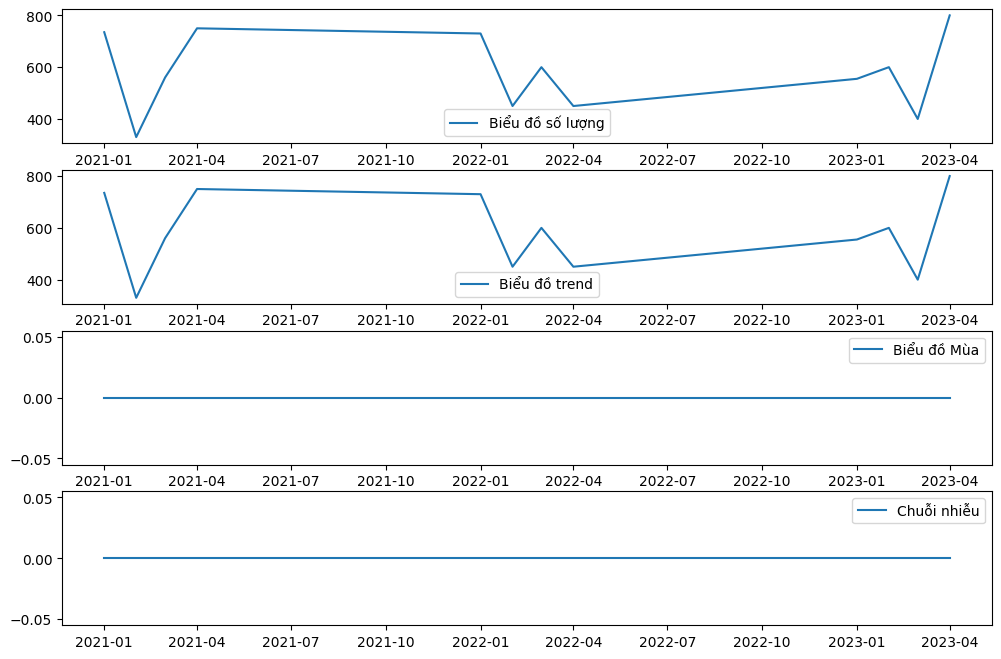

In [19]:
# Dãy Quantity

plt.figure(figsize=(12, 8))

# Biểu đồ số lượng
plt.subplot(4, 1, 1)
plt.plot(sale['Quantity'], label='Biểu đồ số lượng')
plt.legend()

# Tách trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Biểu đồ trend')
plt.legend()

# Tách mùa
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Biểu đồ Mùa')
plt.legend()

# Tách nhiễu
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Chuỗi nhiễu')
plt.legend()

plt.show()


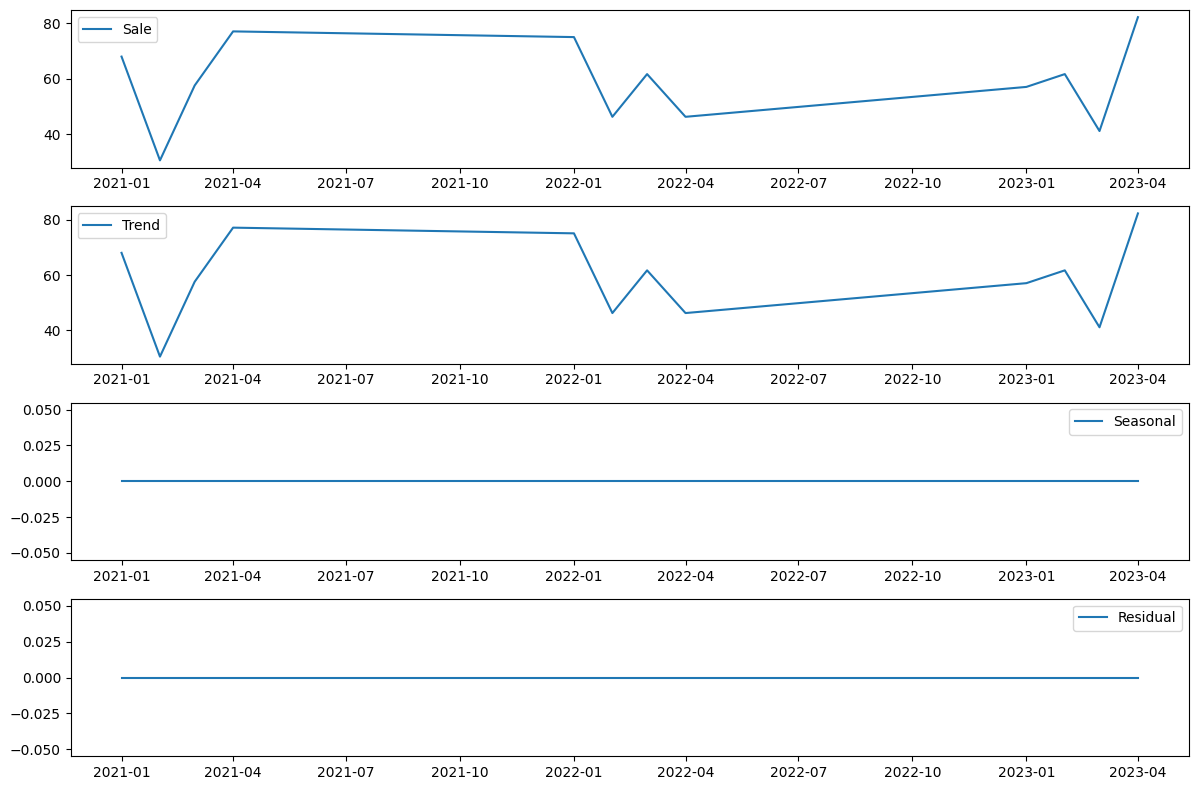

In [20]:
import matplotlib.pyplot as plt

# Dãy sale
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Biểu đồ sale
plt.subplot(4, 1, 1)
plt.plot(sale['Sale'], label='Sale')
plt.legend()

# Biểu đồ Trend
plt.subplot(4, 1, 2)
plt.plot(result2.trend, label='Trend')
plt.legend()

# Biểu đồ Mùa
plt.subplot(4, 1, 3)
plt.plot(result2.seasonal, label='Seasonal')
plt.legend()

# Biểu đồ Nhiễu
plt.subplot(4, 1, 4)
plt.plot(result2.resid, label='Residual')  # Fix the label to 'Residual'
plt.legend()

plt.tight_layout()
plt.show()


### Nhận xét
- Tính mùa không rõ ràng -> Không có thông tin về mùa 
- Tính xu thế không rõ ràng
- Đ bt có phải t vẽ nhầm không nma sao 2 cái giống nhau vcl thế. Thê này thì tương quan nó phải max ping


## 1.3 Kiểm định ADF cho dữ liệu ( tính dừng)

### Quantity

In [21]:
adf1 = adfuller(sale['Quantity'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Nhận xét 
- P-value: Chuỗi đã cho là chuỗi dừng 

### Sales

In [22]:
adf2 = adfuller(sale['Sale'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Nhận xét 
- P-value: Chuỗi đã cho là chuỗi dừng 

## Lấy sai phân

In [24]:
adf3= adfuller(np.diff(sale['Quantity']),regression = 'n', maxlag = 4)
print(f"ADF Stat: {adf3[0]}")
print(f"P-value {adf3[1]}")


ADF Stat: -1.285529812110266
P-value 0.1832294236021812


### Nhận xét 
- Chuỗi Lượng đã cho là dừng 


In [26]:
adf4= adfuller(np.diff(sale['Sale']),regression = 'n', maxlag = 4)
print(f"ADF Stat: {adf4[0]}")
print(f"P-value {adf4[1]}")

ADF Stat: -1.2189444671270764
P-value 0.2043662895984577


### Nhận xét
- Chuỗi Sales đã cho dừng